## Preparation for galaxy light curve 
#### NGC 470 B  spiral galaxy

In [1]:
from astropy.io import fits
import os
import numpy as np
from astropy.modeling import models
from astropy.visualization import ZScaleInterval
from glob import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import scipy.stats as stats
from astropy.stats import sigma_clipped_stats
from astropy.visualization import simple_norm
import photutils
from photutils.aperture import CircularAperture, ApertureStats
from photutils.aperture import aperture_photometry
from photutils.background import Background2D
from photutils.background import MedianBackground
from astropy.stats import sigma_clip
from astropy.wcs import WCS

#### First convert the stacked file into astrometry.net and get wcs

In [2]:
hdu = fits.open('Science/B/processed/stacked/NGC470_474_B_wcs.fits')
header = hdu[0].header
wcs = WCS(header)

In [207]:
wcs, header

(WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
 CRVAL : 19.8181660628  3.43214712246  
 CRPIX : 1618.20292854  2047.34336853  
 CD1_1 CD1_2  : 0.000124842614618  -6.42334029419e-07  
 CD2_1 CD2_2  : 4.14871496418e-07  -0.000125126649427  
 NAXIS : 5832  4375,
 SIMPLE  =                    T / file does conform to FITS standard             
 BITPIX  =                  -32 / number of bits per data pixel                  
 NAXIS   =                    2 / number of data axes                            
 NAXIS1  =                 5832 / length of data axis 1                          
 NAXIS2  =                 4375 / length of data axis 2                          
 EXTEND  =                    T / FITS dataset may contain extensions            
 COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
 COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
 BZERO   =                   0. / offset data rang

In [222]:
print(header)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 5832 / length of data axis 1                          NAXIS2  =                 4375 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H BZERO   =                   0. / offset data range to that of unsigned short    BSCALE  =                   1. / default scaling factor                         DATE    = '2023-12-23T10:18:08' / UTC date that FITS file was created           STACKCNT=                    9 / Stack frames                                   XBINNING=                    1 / Camera 

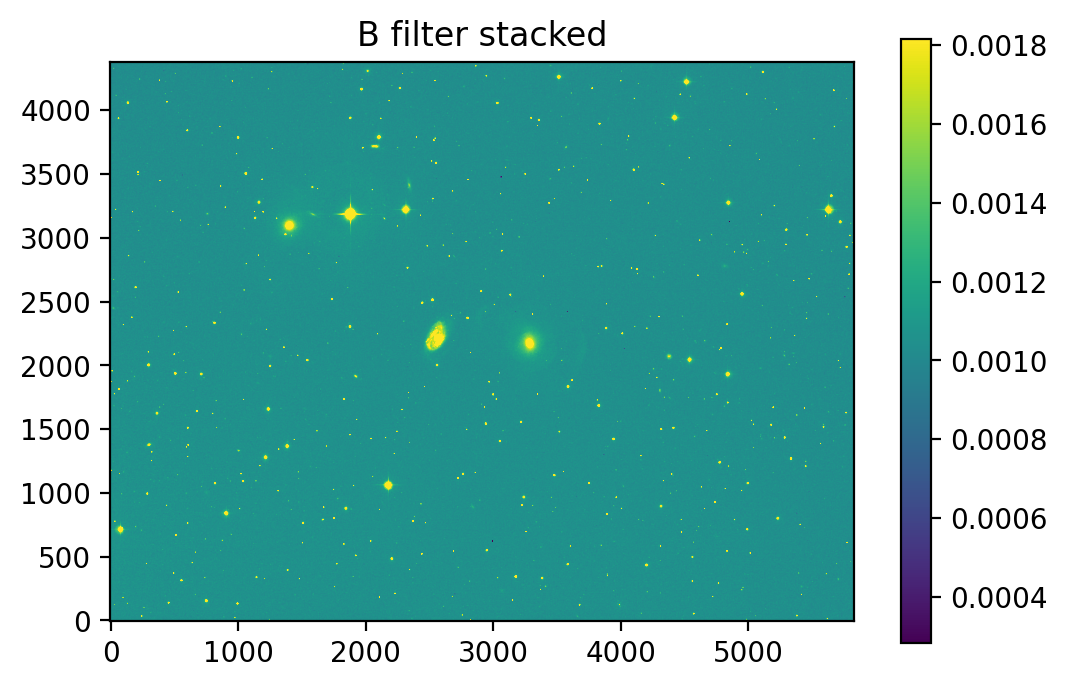

In [3]:
## after siril stacking
from astropy.visualization import simple_norm

b_filter_stacked = hdu[0].data

# plot the b filter sci image
vmin, vmax = ZScaleInterval().get_limits(b_filter_stacked)
plt.figure(dpi=200)
norm = simple_norm(b_filter_stacked, stretch='sqrt', percent=99.9)

#plt.imshow(v_filter_stacked,  origin='lower', norm=norm)

# zoom in of NGC440
plt.imshow(b_filter_stacked, origin='lower', vmin=vmin, vmax=vmax,)
plt.colorbar()
plt.title(r'B filter stacked', )


plt.show()



### this figure is important replot!!!

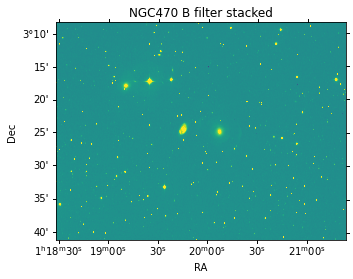

In [4]:
ax = plt.subplot(projection=wcs)
ax.imshow(b_filter_stacked, origin='lower', vmin=vmin, vmax=vmax)
plt.title('NGC470 B filter stacked')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [5]:
##### calculations of background brightness #####
from astropy.stats import sigma_clipped_stats

results = sigma_clipped_stats(b_filter_stacked, sigma=5, maxiters=5) 
# here I set the sigma as 5 since there are faint objects.
results # mean, median, std

(0.0010519059, 0.0010488757, 0.00013502664)

In [5]:
sigma_clipped_stats

<function astropy.stats.sigma_clipping.sigma_clipped_stats(data, mask=None, mask_value=None, sigma=3.0, sigma_lower=None, sigma_upper=None, maxiters=5, cenfunc='median', stdfunc='std', std_ddof=0, axis=None, grow=False)>

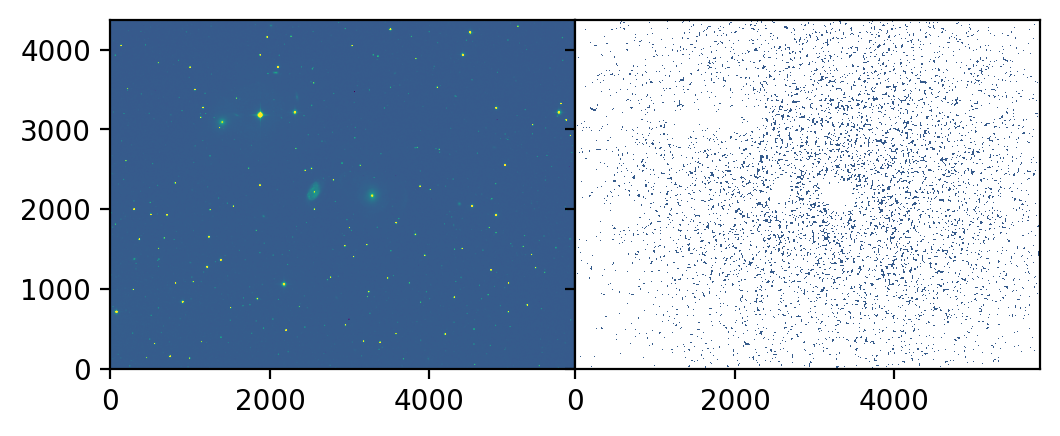

In [6]:
# check the image after sigma clipping
b_filter_clipped_img = sigma_clip(b_filter_stacked)
# background(mean, median, std)=(0.0010519059, 0.0010488757, 0.00013502664)

# plot the image after sigma clipping
fig, ax = plt.subplots(nrows=1, ncols=2, dpi=200, sharey=True)

ax[0].imshow(b_filter_stacked, origin='lower', norm=norm)
ax[1].imshow(b_filter_clipped_img, origin='lower', norm=norm)

plt.subplots_adjust(wspace=0)
#plt.title('Background brightness measurement')
#ax[0].set_xticks([])
#ax[0].set_yticks([])
#ax[1].set_xticks([])
plt.show()

#### Check background brightness

In [7]:
### bacjground brightness #####
#b_filter_bk_subtracted = sigma_clipped_stats(b_filter_stacked, sigma=5, maxiters=5) 

# Estimate the background using sigma-clipped statistics
mean, median, std = sigma_clipped_stats(b_filter_stacked, sigma=5, maxiters=5)
bkg_error = std
# Subtract the background contribution
b_filter_subtracted = b_filter_stacked - median
median,mean,std

(0.0010488757, 0.0010519059, 0.00013502664)

#### Plot flux sum

C:\Users\陳庠宇\AppData\Local\Temp/ipykernel_24560/3361305330.py:3: DeprecationWarning: `photutils.EllipticalAperture` is a deprecated alias for `photutils.aperture.EllipticalAperture` and will be removed in the future. Instead, please use `from photutils.aperture import EllipticalAperture` to silence this warning.
  from photutils import EllipticalAperture


Flux: 0.11467401200681886 Area: 5.6548667764616285 pix2
Flux: 0.3803005945383406 Area: 22.61946710584651 pix2
Flux: 0.6577110428009352 Area: 50.89380098815466 pix2
Flux: 0.8952771676005384 Area: 90.47786842338604 pix2
Flux: 1.0931419346692797 Area: 141.37166941154072 pix2
Flux: 1.2613727311264458 Area: 203.57520395261866 pix2
Flux: 1.4115854200969795 Area: 277.08847204661976 pix2
Flux: 1.5529217129515622 Area: 361.91147369354417 pix2
Flux: 1.6910136375432385 Area: 458.0442088933918 pix2
Flux: 1.823150329618185 Area: 565.4866776461628 pix2
Flux: 1.9592750211497638 Area: 684.238879951857 pix2
Flux: 2.1015715104925756 Area: 814.3008158104747 pix2
Flux: 2.246413311468129 Area: 955.6724852220152 pix2
Flux: 2.393665673618064 Area: 1108.353888186479 pix2
Flux: 2.5467431435889263 Area: 1272.345024703866 pix2
Flux: 2.703665920569894 Area: 1447.6458947741767 pix2
Flux: 2.8614911233106284 Area: 1634.2564983974107 pix2
Flux: 3.0253322704834122 Area: 1832.1768355735671 pix2
Flux: 3.190144835293921 

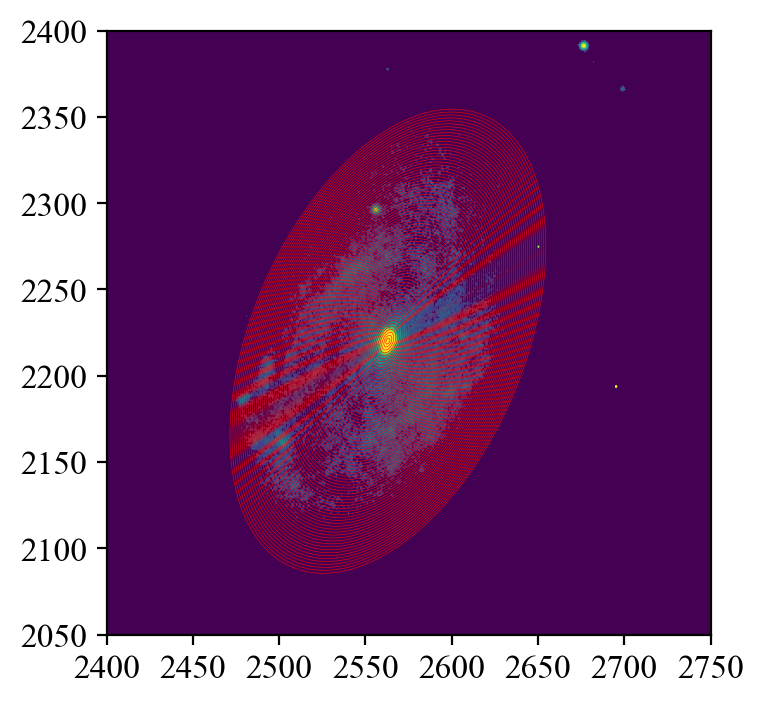

In [24]:
## draw elliptic aperture, center: (2563, 2223) ##
import photutils
from photutils import EllipticalAperture
from photutils.aperture import ApertureStats
from astropy.coordinates import Angle
theta = Angle(67, 'deg')
plt.figure(dpi=200)


flux = []
i_radii = []

#rad = np.array([[200,100],[120,60],[100, 50], [80, 40], [60, 30], [60, 30],[10,5]])
for i in range(1,80, 1):  # 80 aperatures
    #i = i + 30  # Check object position is well covered by aperatures
    rad = np.array([1.8 * i, i])
     
    aper = EllipticalAperture([2563, 2220], rad[0],rad[1], theta)
    #aper = EllipticalAperture([2563, 2223], rad[i][0],rad[i][1], theta)
    aper.plot(color='r', lw=0.2)

    ## find flux within the aperture
    phot_table = aperture_photometry(b_filter_subtracted, aper)
    #print(phot_table)
    aperstats = ApertureStats(b_filter_subtracted, aper)
    print('Flux:',aperstats.sum, 'Area:', aperstats.sum_aper_area)
    #print(phot_table['aperture_sum'][0])
    #print(aperstats.sum_aper_area)
    #flux[0].append(aperstats.sum_aper_area)
    
    flux.append(aperstats.sum)
    
    i_radii.append(aperstats.sum_aper_area)
    #i_radii.append(aperstats.sum_aper_area/{np.pi*2*i**2})

#plt.legend()
plt.xlim(2400,2750)
plt.ylim(2050,2400)
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.imshow(b_filter_subtracted, origin='lower',norm=norm )

Text(0, 0.5, 'Flux($\\mu$Jy)')

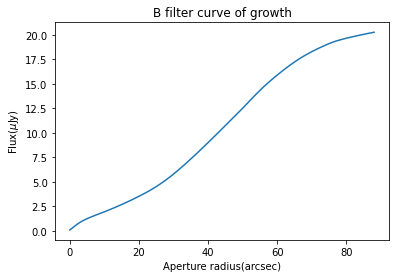

In [228]:
#i_values = np.arange(1, 100, 1)  # Adjust the range as needed
#numeric_part = aperstats.sum_aper_area.split[0]
# Calculate the ratio for each i
#i_radii = [aperstats.sum_aper_area / (np.pi * 2 * i**2) for i in i_values]
# plot the b filter sci image

plt.title(r'B filter curve of growth' )

plt.plot(flux)
plt.xlabel('Aperture radius(arcsec)')  # after 2x2 binning, = 0.45"/pixel
#plt.xlim(5, 70)
plt.ylabel('Flux($\mu$Jy)')


In [229]:
print(rad)

[160.2  89. ]


In [231]:
print(flux)

[0.11467401200681886, 0.3803005945383406, 0.6577110428009352, 0.8952771676005384, 1.0931419346692797, 1.2613727311264458, 1.4115854200969795, 1.5529217129515622, 1.6910136375432385, 1.823150329618185, 1.9592750211497638, 2.1015715104925756, 2.246413311468129, 2.393665673618064, 2.5467431435889263, 2.703665920569894, 2.8614911233106284, 3.0253322704834122, 3.190144835293921, 3.3635635981408347, 3.541709390109123, 3.7239909598492216, 3.9079530160943423, 4.102822365024149, 4.309859844431259, 4.528872881411424, 4.760045001481688, 5.001651585825249, 5.2583532570246225, 5.523937907142418, 5.805764637483634, 6.097219381764615, 6.401429612814676, 6.709290010190261, 7.024671165509234, 7.34772594007149, 7.6718368961896655, 8.0006695844426, 8.33695011976308, 8.673879244316774, 9.015647658412016, 9.359596303240679, 9.70654185415387, 10.05349380946685, 10.403561380354114, 10.755240278704715, 11.105791100899747, 11.459580630320247, 11.811396726665008, 12.16116173069975, 12.517952522431655, 12.886191

In [232]:
print(i_radii)

[<Quantity 5.65486678 pix2>, <Quantity 22.61946711 pix2>, <Quantity 50.89380099 pix2>, <Quantity 90.47786842 pix2>, <Quantity 141.37166941 pix2>, <Quantity 203.57520395 pix2>, <Quantity 277.08847205 pix2>, <Quantity 361.91147369 pix2>, <Quantity 458.04420889 pix2>, <Quantity 565.48667765 pix2>, <Quantity 684.23887995 pix2>, <Quantity 814.30081581 pix2>, <Quantity 955.67248522 pix2>, <Quantity 1108.35388819 pix2>, <Quantity 1272.3450247 pix2>, <Quantity 1447.64589477 pix2>, <Quantity 1634.2564984 pix2>, <Quantity 1832.17683557 pix2>, <Quantity 2041.4069063 pix2>, <Quantity 2261.94671058 pix2>, <Quantity 2493.79624842 pix2>, <Quantity 2736.95551981 pix2>, <Quantity 2991.42452475 pix2>, <Quantity 3257.20326324 pix2>, <Quantity 3534.29173529 pix2>, <Quantity 3822.68994089 pix2>, <Quantity 4122.39788004 pix2>, <Quantity 4433.41555275 pix2>, <Quantity 4755.742959 pix2>, <Quantity 5089.38009882 pix2>, <Quantity 5434.32697218 pix2>, <Quantity 5790.5835791 pix2>, <Quantity 6158.14991957 pix2>, 

In [ ]:
### flux magnitude convert (B filter)###
# alert!! the flux is not net flux, and have to subtract the background (sigma clip stats)
# flux error and background error check!!!
# instrumental magnitude and standard stars from APASS